# Bike Sharing 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

from datetime import datetime

%matplotlib inline

### Import data

In [26]:
#import data

station_df = pd.read_csv('data/station.csv')
trip_df = pd.read_csv('data/trip.csv')
weather_df = pd.read_csv('data/weather.csv')

### Examine station data

In [27]:
station_df.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [28]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [29]:
#look for missing data; should be zero as info summary above gives 70 entries for each column
station_df.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

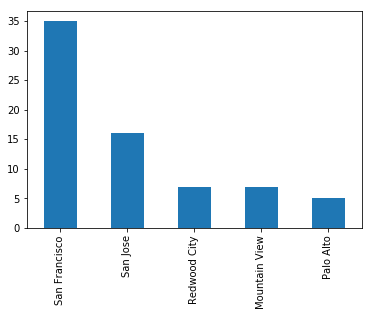

In [10]:
#stations by city
station_df.city.value_counts().plot(kind='bar')
# SF has 35 stations

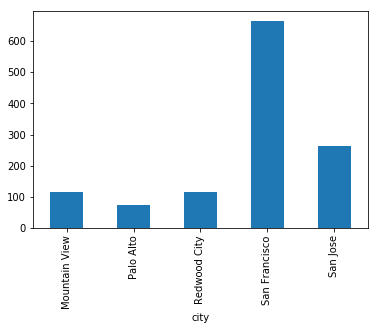

In [11]:
# number of docks per city   
station_df.groupby('city')['dock_count'].sum().plot(kind='bar')
# SF has 665

### Narrow focus to SF

In [30]:
# Narrow focus to SF
sf_stations = station_df[station_df.city == 'San Francisco']
sf_stations.head()

,id,name,lat,long,dock_count,city,installation_date
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,8/19/2013
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,8/19/2013
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,8/19/2013
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,8/19/2013


In [88]:
sf_stations.dock_count.sum()

665

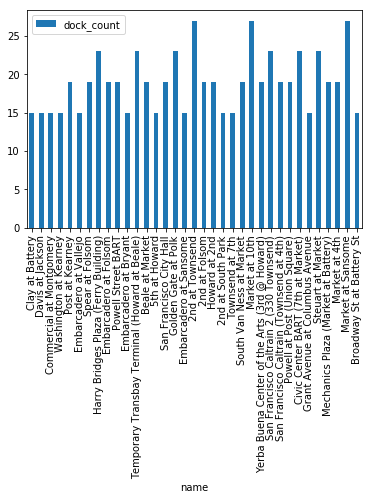

In [120]:
#number of docks per sf station
sf_stations.plot(kind='bar', x='name', y='dock_count')


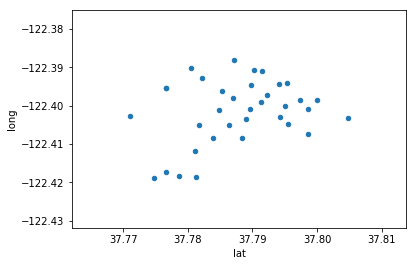

In [92]:
#How spread out are the stations?
sf_stations.plot(kind='scatter', x='lat', y='long')

### Examine trip data

In [233]:
trip_df.head(50)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,1.716667,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,1.816667,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,1.850000,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,1.883333,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,1.900000,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [9]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [10]:
trip_df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In [11]:
#Convert to datetime so that it can be manipulated more easily
trip_df.start_date = pd.to_datetime(trip_df.start_date, format='%m/%d/%Y %H:%M')
trip_df.end_date = pd.to_datetime(trip_df.end_date, format='%m/%d/%Y %H:%M')

In [12]:
#duration is time of trip in seconds; convert to minutes
trip_df.duration = trip_df.duration / 60
trip_df.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

************remove 3sd as outlier,  boxplot

###trip_df_clean = trip_df[(trip_df.duration<600) & (trip_df.duration>4)]
###trip_df_clean.info()


In [13]:
####REMOVE IF USING 3SD METHOD


#Remove outliers over 10 hours; under 5 minutes (mistakes?)
#trip_df.duration.plot(kind='box')
trip_df_clean = trip_df[(trip_df.duration<600) & (trip_df.duration>4)]
trip_df_clean.info()

# 1.05% of data is removed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599298 entries, 68 to 669958
Data columns (total 11 columns):
id                    599298 non-null int64
duration              599298 non-null float64
start_date            599298 non-null datetime64[ns]
start_station_name    599298 non-null object
start_station_id      599298 non-null int64
end_date              599298 non-null datetime64[ns]
end_station_name      599298 non-null object
end_station_id        599298 non-null int64
bike_id               599298 non-null int64
subscription_type     599298 non-null object
zip_code              592881 non-null object
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 54.9+ MB


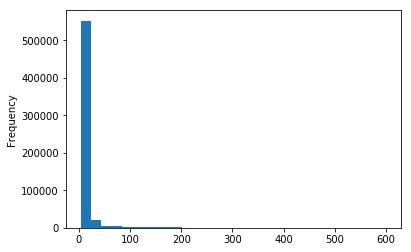

In [22]:
trip_df_clean.duration.plot(kind='hist', bins=30)

In [23]:
############################
trip_df.groupby('duration').head(50)
#######get rid of same station - end and start? IF TRIP LESS THAN A FEW MINUTES??

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103
5,4927,1.716667,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,1.816667,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112
7,4563,1.850000,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112
8,4760,1.883333,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103
9,4258,1.900000,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060


In [31]:
# trips in SF only
sf_id = list(sf_stations.id)
sf_trips = trip_df[trip_df.start_station_id.isin(sf_id)]
sf_trips.start_station_id.unique()

array([66, 59, 49, 64, 41, 47, 67, 74, 39, 58, 56, 55, 61, 72, 45, 76, 62,
       46, 68, 71, 69, 73, 48, 75, 70, 50, 77, 65, 60, 42, 54, 57, 51, 63,
       82])

In [ ]:
###########################################
# want to do scatter instead, but getting error
###########################################

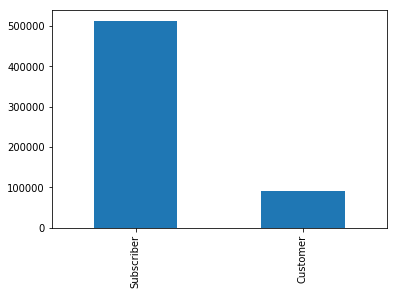

In [32]:
##subscription type
sf_trips.subscription_type.value_counts().plot(kind='bar')

In [ ]:
####weekday vs weekend trips    **************

In [33]:
sf_trips['weekday'] = pd.DatetimeIndex(sf_trips.start_date).dayofweek
sf_trips['DOW'] = sf_trips.loc[sf_trips['weekday'].isin([5,6]), 'weekend', 'weekday']

#sf_trips.loc[sf_trips['weekday'].isin([5,6]), 'dow'] == "weekend"

sf_trips.DOW.value_counts().plot(kind='bar')


/Users/janellaslaga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


IndexingError: Too many indexers

In [34]:
#trips vs day
sf_trips['date'] = pd.DatetimeIndex(sf_trips.start_date).date

/Users/janellaslaga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


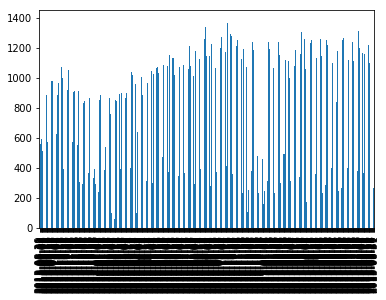

In [210]:
######################################################

#should I limit to a year or two?  **redo with respect to month or quarter
# fix x axis?

sf_trips.date.value_counts().sort_index().plot(kind='bar')

In [182]:
sf_trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,weekday,DOW,date
0,4576,1.050000,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,weekday,2013-08-29
4,4299,1.383333,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,3,weekday,2013-08-29
5,4927,1.716667,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109,3,weekday,2013-08-29
8,4760,1.883333,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103,3,weekday,2013-08-29
10,4549,2.083333,8/29/2013 13:52,Spear at Folsom,49,8/29/2013 13:55,Embarcadero at Bryant,54,368,Subscriber,94109,3,weekday,2013-08-29


In [ ]:
####weekday vs weekend trips,  sub vs cust

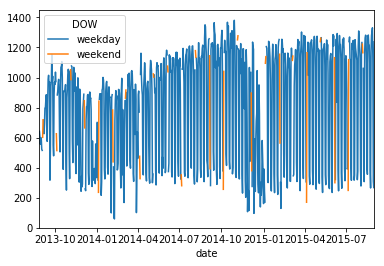

In [220]:
#weekday_df = sf_trips[sf_trips.weekday == 'weekday']
#weekend_df = sf_trips[sf_trips.weekday == 'weekend']

p=sf_trips.groupby(['date', 'DOW']).size().unstack()#.fillna(0)
p.plot(ylim=0)


In [19]:
table = sf_trips.pivot_table(values='id', index='DOW', columns='subscription_type' , aggfunc=lambda x:len(x.unique))

KeyError: 'DOW'

In [229]:
############################################################################# create pivot table
p=sf_trips.groupby(['DOW', 'subscription_type']).count()

p#.plot(kind='line', x='date')


id  duration  start_date  start_station_name  \
DOW     subscription_type                                                     
weekday Customer            84910     84910       84910               84910   
        Subscriber         478942    478942      478942              478942   
weekend Customer             5800      5800        5800                5800   
        Subscriber          34056     34056       34056               34056   

                           start_station_id  end_date  end_station_name  \
DOW     subscription_type                                                 
weekday Customer                      84910     84910             84910   
        Subscriber                   478942    478942            478942   
weekend Customer                       5800      5800              5800   
        Subscriber                    34056     34056             34056   

                           end_station_id  bike_id  zip_code  weekday    date  
DOW     subscription_type                                                      
weekday Customer                    84910    84910     79242    84910   84910  
        Subscriber                 478942   478942    478942   478942  478942  
weekend Customer                     5800     5800      5359     5800    5800  
        Subscriber                  34056    34056     34056    34056   34056

In [40]:
trip_df.end_station_name.value_counts()

San Francisco Caltrain (Townsend at 4th)         63179
San Francisco Caltrain 2 (330 Townsend)          35117
Harry Bridges Plaza (Ferry Building)             33193
Embarcadero at Sansome                           30796
2nd at Townsend                                  28529
Market at Sansome                                28033
Townsend at 7th                                  26637
Steuart at Market                                25025
Temporary Transbay Terminal (Howard at Beale)    23080
Market at 4th                                    19915
Powell Street BART                               19898
Market at 10th                                   17864
2nd at South Park                                16843
5th at Howard                                    14849
Civic Center BART (7th at Market)                14339
Howard at 2nd                                    14009
Embarcadero at Folsom                            13532
Embarcadero at Bryant                            13144
Embarcader

In [35]:
weather_df.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [36]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
date                              3665 non-null object
max_temperature_f                 3661 non-null float64
mean_temperature_f                3661 non-null float64
min_temperature_f                 3661 non-null float64
max_dew_point_f                   3611 non-null float64
mean_dew_point_f                  3611 non-null float64
min_dew_point_f                   3611 non-null float64
max_humidity                      3611 non-null float64
mean_humidity                     3611 non-null float64
min_humidity                      3611 non-null float64
max_sea_level_pressure_inches     3664 non-null float64
mean_sea_level_pressure_inches    3664 non-null float64
min_sea_level_pressure_inches     3664 non-null float64
max_visibility_miles              3652 non-null float64
mean_visibility_miles             3652 non-null float64
min_visibility_miles              3652 non-null float6

In [127]:
weather_df.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

In [37]:
weather_df.isnull().sum()
#events fill with NAN; max gust fill with NAN

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [39]:
weather_df.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,3661.000000,3661.000000,3661.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3664.000000,...,3664.000000,3652.000000,3652.000000,3652.000000,3664.000000,3664.000000,2766.000000,3664.000000,3664.000000,3665.000000
mean,70.580989,61.348812,51.947282,53.149820,48.794794,44.306840,85.446968,67.256993,46.458045,30.074997,...,29.965835,10.555312,9.822015,8.229737,16.398472,5.962063,22.299349,2.784389,266.605895,94325.000000
std,8.385572,7.234397,7.441444,6.885449,7.822281,9.355432,9.226972,10.945591,14.434784,0.134492,...,0.133476,2.193828,1.469894,2.862132,7.787588,3.340603,9.618813,2.276401,102.047645,404.615212
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,94041.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,62.000000,37.000000,29.980000,...,29.880000,10.000000,10.000000,7.000000,13.000000,3.000000,17.000000,1.000000,254.000000,94063.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,3.000000,297.000000,94107.000000
75%,77.000000,67.000000,58.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,5.000000,330.000000,94301.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000,95113.000000



    Ask the following questions and look for the answers using code and plots:
        Can you count something interesting?
        Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
        Can you make a bar plot or a histogram?
        Can you compare two related quantities?
        Can you make a scatterplot?
        Can you make a time-series plot?
    Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
    Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?
